In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import time, warnings
warnings.filterwarnings("ignore")

# Read CSV files
Sales = pd.read_csv("C:/Users/User/Downloads/Sales.csv")
Outlet_map = pd.read_csv("C:/Users/User/Downloads/Distributor Outlet Mapping.csv")

# Merge data frames
df = pd.merge(Sales, Outlet_map, on="outlet_id")

# Display first few rows of the DataFrame
df.head()

# Summary statistics
df.describe()

# Group by distributor_id and count unique outlet_ids
outlet_count = df.groupby("distributor_id")["outlet_id"].nunique().reset_index()
outlet_count.columns = ["distributor_id", "UniqueOutletCount"]

# Print the result
print(outlet_count)

# Cleaning freezer status
df["freezer_status"] = df["freezer_status"].apply(lambda x: "no freezers available" if x == " no freezers available " else "freezers available")

# Summary of factor variable
df["freezer_status"] = pd.Categorical(df["freezer_status"])
df["freezer_status"].describe()

# Display DataFrame structure
df.info()



    distributor_id  UniqueOutletCount
0    distributor_1                 86
1   distributor_10                157
2   distributor_11                300
3   distributor_12                174
4   distributor_13                175
5   distributor_14                312
6   distributor_15                148
7   distributor_16                281
8   distributor_17                 85
9   distributor_18                 80
10  distributor_19                169
11   distributor_2                 96
12  distributor_20                174
13  distributor_21                 91
14  distributor_22                 98
15  distributor_23                167
16  distributor_24                162
17  distributor_25                314
18   distributor_3                182
19   distributor_4                293
20   distributor_5                180
21   distributor_6                 80
22   distributor_7                 84
23   distributor_8                165
24   distributor_9                147
<class 'pand

In [4]:
df["distributor_id"] = pd.Categorical(df["distributor_id"])
df["outlet_id"] = pd.Categorical(df["outlet_id"])
df["sku_name"] = pd.Categorical(df["sku_name"])

# Changing format of rainfall
df["expected_rainfall"] = pd.to_numeric(df["expected_rainfall"].str[:-2])

# Display DataFrame structure after changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371036 entries, 0 to 371035
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   outlet_id          371036 non-null  category
 1   transaction_time   371036 non-null  object  
 2   expected_rainfall  371036 non-null  float64 
 3   freezer_status     371036 non-null  category
 4   sku_name           371036 non-null  category
 5   sales_quantity     371036 non-null  int64   
 6   distributor_id     371036 non-null  category
dtypes: category(4), float64(1), int64(1), object(1)
memory usage: 10.4+ MB


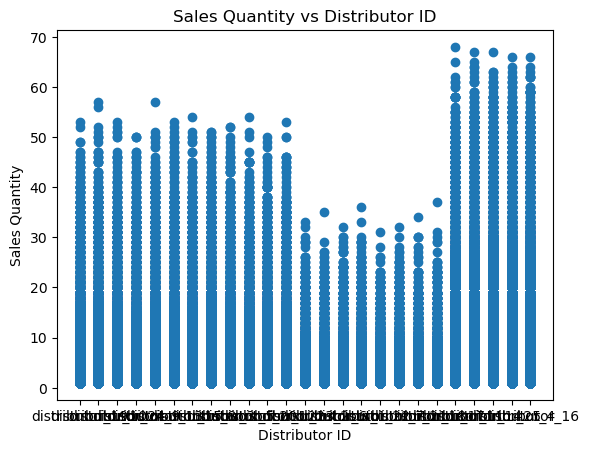

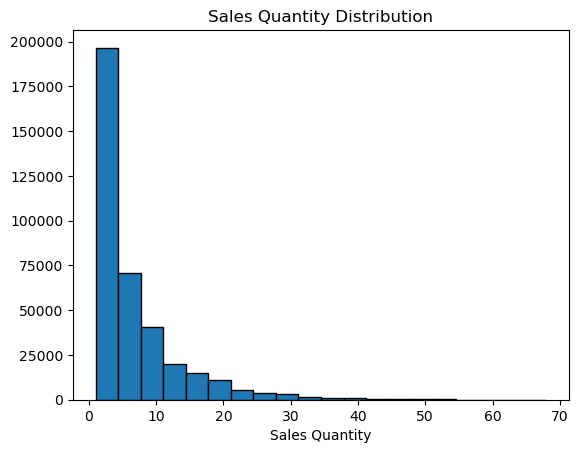

In [5]:
# Plotting using matplotlib
plt.scatter(df["distributor_id"], df["sales_quantity"])
plt.title("Sales Quantity vs Distributor ID")
plt.xlabel("Distributor ID")
plt.ylabel("Sales Quantity")
plt.show()

# Histogram using matplotlib
plt.hist(df["sales_quantity"], bins=20, edgecolor="black")
plt.title("Sales Quantity Distribution")
plt.xlabel("Sales Quantity")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371036 entries, 0 to 371035
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   outlet_id          371036 non-null  category
 1   transaction_time   371036 non-null  object  
 2   expected_rainfall  371036 non-null  float64 
 3   freezer_status     371036 non-null  category
 4   sku_name           371036 non-null  category
 5   sales_quantity     371036 non-null  int64   
 6   distributor_id     371036 non-null  int8    
dtypes: category(3), float64(1), int64(1), int8(1), object(1)
memory usage: 10.4+ MB


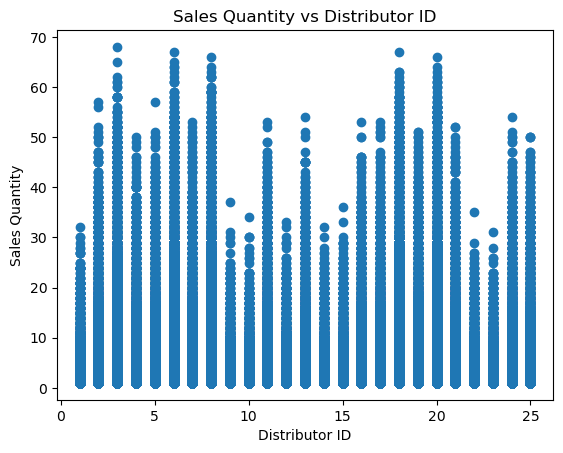

In [6]:
# Convert distributor_id to category with custom codes
df["distributor_id"] = df["distributor_id"].astype("category")
df["distributor_id"] = df["distributor_id"].cat.codes + 1

# Display DataFrame structure after changes
df.info()

# Create a scatter plot with ordered distributor_id
plt.scatter(df["distributor_id"], df["sales_quantity"])
plt.title("Sales Quantity vs Distributor ID")
plt.xlabel("Distributor ID")
plt.ylabel("Sales Quantity")
plt.show()


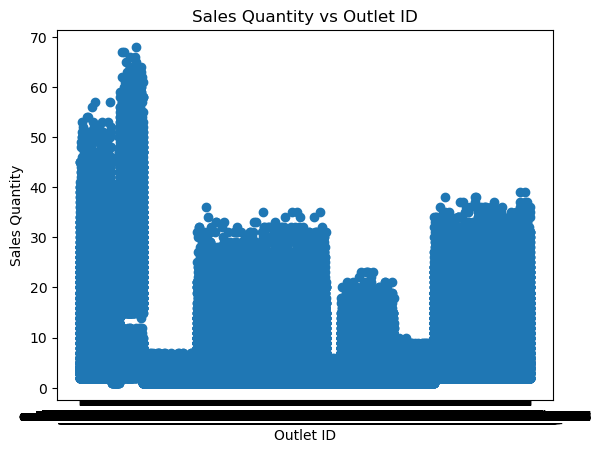

In [7]:
plt.scatter(df["outlet_id"], df["sales_quantity"])
plt.title("Sales Quantity vs Outlet ID")
plt.xlabel("Outlet ID")
plt.ylabel("Sales Quantity")
plt.show()

In [7]:
# Assuming df is your DataFrame
total_sales_per_outlet = df.groupby("outlet_id")["sales_quantity"].sum().reset_index()

# Display the result
print(total_sales_per_outlet)

             outlet_id  sales_quantity
0        outlet_code_1             572
1       outlet_code_10            1756
2      outlet_code_100             905
3     outlet_code_1000             174
4     outlet_code_1001             192
...                ...             ...
4195   outlet_code_995             743
4196   outlet_code_996             837
4197   outlet_code_997            1156
4198   outlet_code_998            1204
4199   outlet_code_999             177

[4200 rows x 2 columns]


In [8]:
# Assuming df is your DataFrame
total_sales_per_outlet = df.groupby("outlet_id", observed=False)["sales_quantity"].sum().reset_index()

# Calculate the proportion of sales for each outlet
total_sales_per_outlet["sales_proportion"] = (total_sales_per_outlet["sales_quantity"] / total_sales_per_outlet["sales_quantity"].sum()).round(10)

# Display the result
print(total_sales_per_outlet)


             outlet_id  sales_quantity  sales_proportion
0        outlet_code_1             572          0.000227
1       outlet_code_10            1756          0.000697
2      outlet_code_100             905          0.000359
3     outlet_code_1000             174          0.000069
4     outlet_code_1001             192          0.000076
...                ...             ...               ...
4195   outlet_code_995             743          0.000295
4196   outlet_code_996             837          0.000332
4197   outlet_code_997            1156          0.000459
4198   outlet_code_998            1204          0.000478
4199   outlet_code_999             177          0.000070

[4200 rows x 3 columns]


In [9]:
# Calculate the assigned sales based on sales proportion and a constant value
total_sales_per_outlet["assigned_sales"] = total_sales_per_outlet["sales_proportion"] * 547575

# Print the result
print(total_sales_per_outlet)
total_sales_per_outlet["assigned_sales"].sum()

             outlet_id  sales_quantity  sales_proportion  assigned_sales
0        outlet_code_1             572          0.000227      124.340648
1       outlet_code_10            1756          0.000697      381.717161
2      outlet_code_100             905          0.000359      196.727818
3     outlet_code_1000             174          0.000069       37.823907
4     outlet_code_1001             192          0.000076       41.736714
...                ...             ...               ...             ...
4195   outlet_code_995             743          0.000295      161.512448
4196   outlet_code_996             837          0.000332      181.946031
4197   outlet_code_997            1156          0.000459      251.289888
4198   outlet_code_998            1204          0.000478      261.724039
4199   outlet_code_999             177          0.000070       38.476069

[4200 rows x 4 columns]


547574.99934291

In [36]:
import pandas as pd

# Merge with Distributor Outlet Mapping
mapping = pd.read_csv("C:/Users/User/Downloads/Distributor Outlet Mapping.csv")

# Merge total_sales_per_outlet with mapping on 'outlet_id'
df2 = pd.merge(total_sales_per_outlet, mapping, on="outlet_id", how="inner")

# Convert distributor_id to a categorical variable
df2["distributor_id"] = pd.Categorical(df2["distributor_id"])

# Sum up the assigned sales for each distributor
df3 = df2.groupby("distributor_id")["assigned_sales"].sum().reset_index()

# Print the result
print(df3)
print("Total Assigned Sales for All Distributors:", df3["assigned_sales"].sum())

df3.head()


    distributor_id  assigned_sales
0    distributor_1     7383.922714
1   distributor_10    19749.732552
2   distributor_11    48185.052334
3   distributor_12    20027.542483
4   distributor_13    21041.179921
5   distributor_14    52729.573127
6   distributor_15    18727.400116
7   distributor_16    46677.965549
8   distributor_17     6738.525083
9   distributor_18     6750.263722
10  distributor_19    20629.464740
11   distributor_2     8446.904873
12  distributor_20    19622.783640
13  distributor_21     7070.897249
14  distributor_22     8393.430067
15  distributor_23    18870.217697
16  distributor_24    19892.767575
17  distributor_25    54101.885386
18   distributor_3    22536.528669
19   distributor_4    50016.903278
20   distributor_5    20278.398090
21   distributor_6     6950.469462
22   distributor_7     6652.008342
23   distributor_8    19082.597398
24   distributor_9    17018.585277
Total Assigned Sales for All Distributors: 547574.99934291


,distributor_id,assigned_sales
0,distributor_1,7383.922714
1,distributor_10,19749.732552
2,distributor_11,48185.052334
3,distributor_12,20027.542483
4,distributor_13,21041.179921


In [33]:
import pandas as pd

df3['distributor_id_numeric'] = df3['distributor_id'].str.extract('(\d+)', expand=False).astype(int)

# Sort df3 based on the numerical part of "distributor_id"
df3 = df3.sort_values(by='distributor_id_numeric')

# Drop the temporary column used for sorting
df3 = df3.drop(columns=['distributor_id_numeric'])

# Rename the "assigned_sales" column to "sales_target"
df3 = df3.rename(columns={'assigned_sales': 'sales_target'})

# Round the "sales_target" column to 2 decimal places
df3['sales_target'] = df3['sales_target'].round(0).astype(int)

df3['sales_target'].sum()


547576

In [35]:
# Save df3 as a CSV file
df3.to_csv("Part1_TeamJarvis.csv", index=False)